In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
import os
import seaborn as sns
from scipy import stats
import sys
sys.path.append('..')
from madule import simulation
from madule import plots
from statsmodels.stats.anova import AnovaRM

In [26]:
# read collected data across data
behAll = pd.read_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/AllBehData/rawBehAll.csv')
# Calculuate left correct rewarding

leftCorrect = behAll['leftCanBePushed                ']*behAll.pushCorrect + (1-behAll['leftCanBePushed                '])*(1-behAll.pushCorrect)
behAll['leftCorrect'] = leftCorrect

## Simulation study

#### Agetn constantly take Left, Push, or Yellow across trials in a differtn simulation

Text(0, 0.5, 'Total amount')

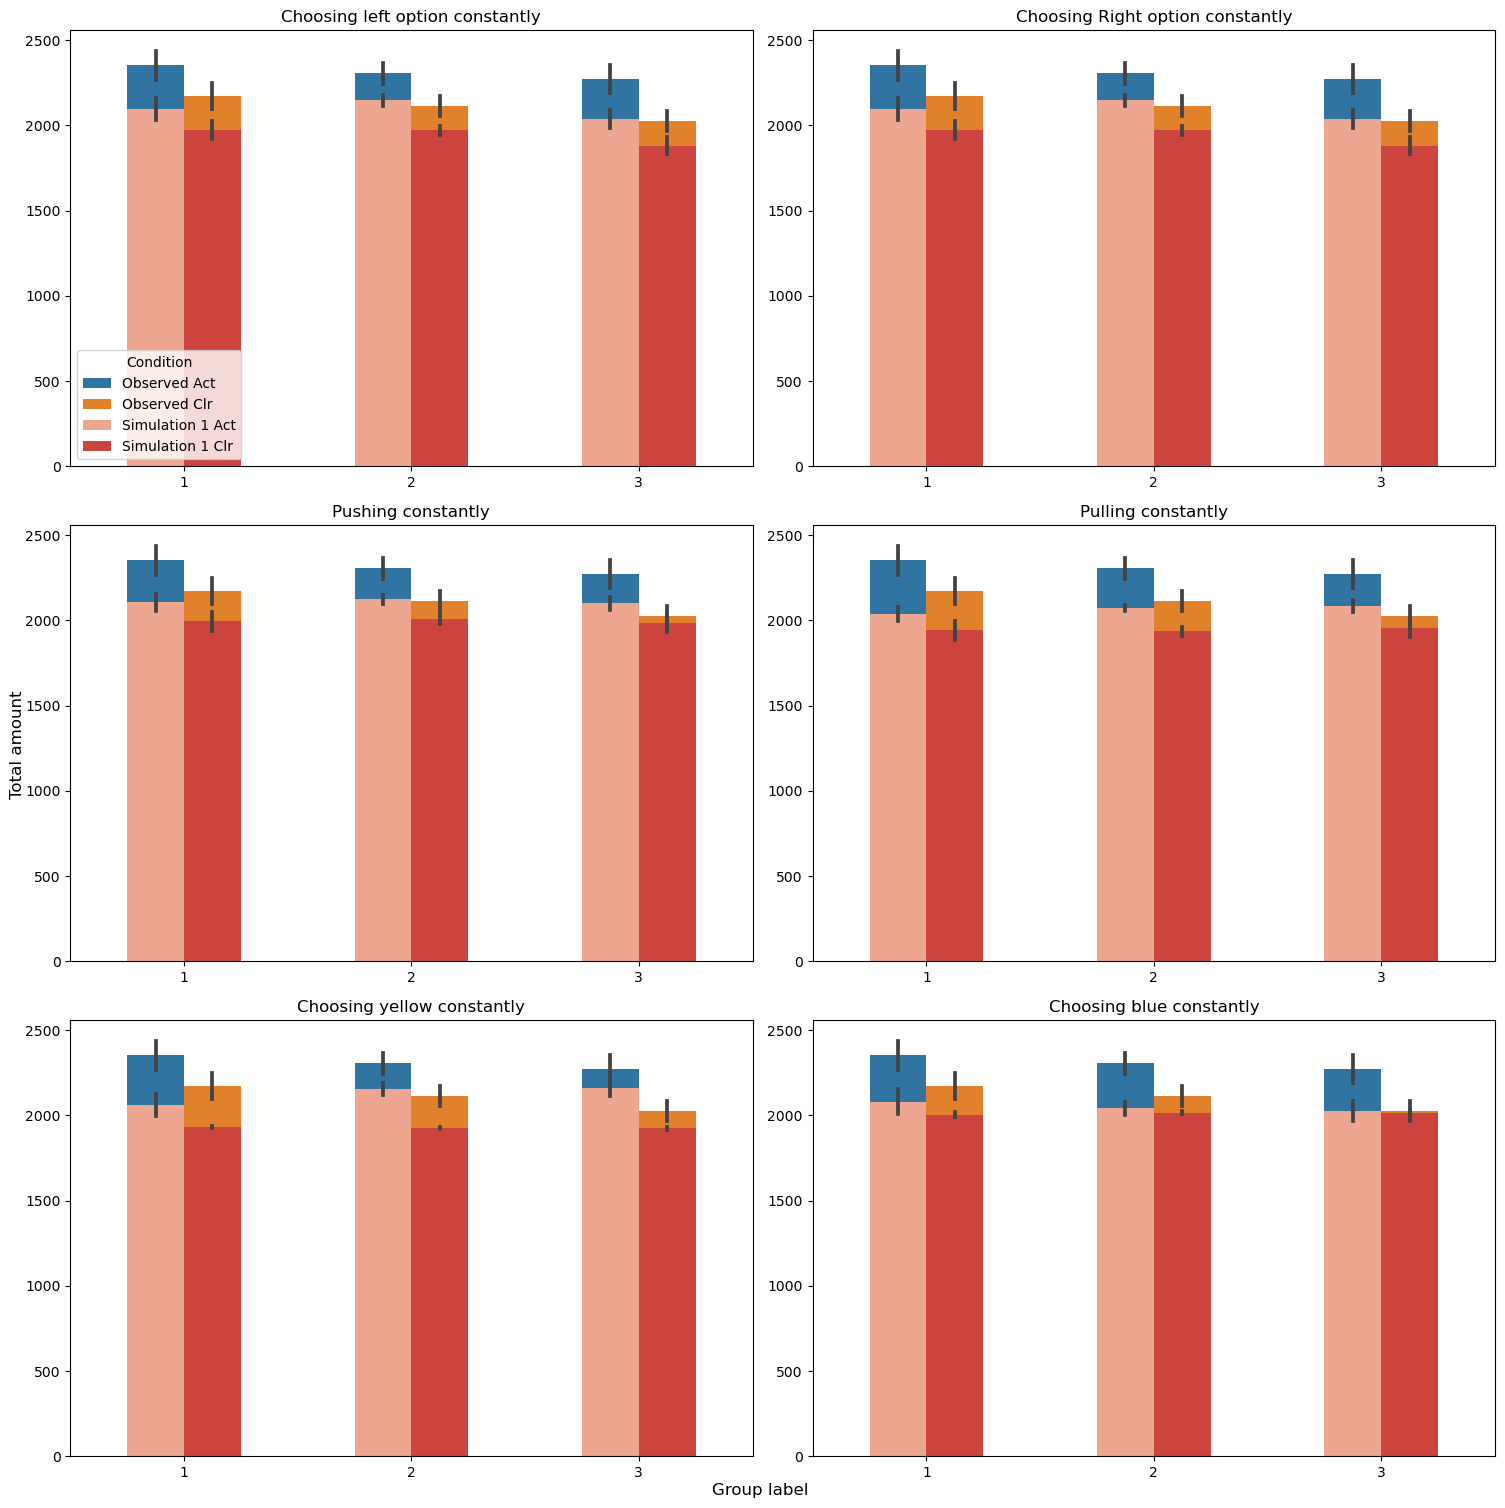

In [16]:
"""This agent select left option constantly"""
agentLeft = behAll['leftCorrect']*behAll['winAmtLeft']
behAll['agentLeft'] = agentLeft
"""This agent select right option constantly"""
agentRight = (1-behAll['leftCorrect'])*behAll['winAmtRight']
behAll['agentRight'] = agentLeft
"""This agent pushes constantly"""
agentPush = behAll['pushCorrect']*behAll['winAmtPushable']
behAll['agentPush'] = agentPush
"""This agent pushes constantly"""
agentPull = (1-behAll['pushCorrect'])*behAll['winAmtPullable']
behAll['agentPull'] = agentPull
"""This agent pushes constantly"""
agentYell = behAll['yellowCorrect']*behAll['winAmtYellow']
behAll['agentYell'] = agentYell
"""This agent pushes constantly"""
agentBlue = (1-behAll['yellowCorrect'])*behAll['winAmtBlue']
behAll['agentBlue'] = agentBlue


# Figure
fig = plt.figure(figsize=(15, 15), tight_layout = True)
nrows = 3
ncols = 2

# Plot of left choice
fig.add_subplot(nrows, ncols, 1)
behAll_wonAmount = behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['wonAmount                '].sum()
behAll_wonAmount.loc[behAll_wonAmount['group']==2,'wonAmount                '] = behAll_wonAmount[behAll_wonAmount['group']==2]['wonAmount                ']/2
sns.barplot(data = behAll_wonAmount, x='group', y='wonAmount                ', hue='block', width=.5, errorbar="se")

behAll_wonAmount_agent = behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['agentLeft'].sum()
behAll_wonAmount_agent.loc[behAll_wonAmount_agent['group']==2,'agentLeft'] = behAll_wonAmount_agent[behAll_wonAmount_agent['group']==2]['agentLeft']/2
sn = sns.barplot(data = behAll_wonAmount_agent, x='group', y='agentLeft', hue='block', width=.5, errorbar="se", palette='Reds')
new_title = 'Condition'
sn.legend_.set_title(new_title)
for t, l in zip(sn.legend_.texts,['Observed Act','Observed Clr', 'Simulation 1 Act', 'Simulation 1 Clr']):
    t.set_text(l)
plt.title('Choosing left option constantly')
plt.ylabel('')
plt.xlabel('')


#Plot of right choice
fig.add_subplot(nrows, ncols, 2)
behAll_wonAmount = behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['wonAmount                '].sum()
behAll_wonAmount.loc[behAll_wonAmount['group']==2,'wonAmount                '] = behAll_wonAmount[behAll_wonAmount['group']==2]['wonAmount                ']/2
sns.barplot(data = behAll_wonAmount, x='group', y='wonAmount                ', hue='block', width=.5, errorbar="se")
legend_handles, _= ax.get_legend_handles_labels()

behAll_left_agent = behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['agentRight'].sum()
behAll_left_agent.loc[behAll_left_agent['group']==2,'agentRight'] = behAll_left_agent[behAll_left_agent['group']==2]['agentRight']/2
sn = sns.barplot(data = behAll_left_agent, x='group', y='agentRight', hue='block', width=.5, errorbar="se", palette='Reds')
sn.legend_.remove()
plt.title('Choosing Right option constantly')
plt.ylabel('')
plt.xlabel('')


# Plot of pushing
fig.add_subplot(nrows, ncols, 3)
behAll_wonAmount = behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['wonAmount                '].sum()
behAll_wonAmount.loc[behAll_wonAmount['group']==2,'wonAmount                '] = behAll_wonAmount[behAll_wonAmount['group']==2]['wonAmount                ']/2
sns.barplot(data = behAll_wonAmount, x='group', y='wonAmount                ', hue='block', width=.5, errorbar="se")
legend_handles, _= ax.get_legend_handles_labels()

behAll_push_agent = behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['agentPush'].sum()
behAll_push_agent.loc[behAll_push_agent['group']==2,'agentPush'] = behAll_push_agent[behAll_push_agent['group']==2]['agentPush']/2
sn = sns.barplot(data = behAll_push_agent, x='group', y='agentPush', hue='block', width=.5, errorbar="se", palette='Reds')
sn.legend_.remove()
plt.title('Pushing constantly')
plt.ylabel('')
plt.xlabel('')


# Plot of pushing
fig.add_subplot(nrows, ncols, 4)
behAll_wonAmount = behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['wonAmount                '].sum()
behAll_wonAmount.loc[behAll_wonAmount['group']==2,'wonAmount                '] = behAll_wonAmount[behAll_push_agent['group']==2]['wonAmount                ']/2
sns.barplot(data = behAll_wonAmount, x='group', y='wonAmount                ', hue='block', width=.5, errorbar="se")
legend_handles, _= ax.get_legend_handles_labels()

behAll_pull_agent = behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['agentPull'].sum()
behAll_pull_agent.loc[behAll_pull_agent['group']==2,'agentPull'] = behAll_pull_agent[behAll_pull_agent['group']==2]['agentPull']/2
sn = sns.barplot(data = behAll_pull_agent, x='group', y='agentPull', hue='block', width=.5, errorbar="se", palette='Reds')
sn.legend_.remove()
plt.title('Pulling constantly')
plt.ylabel('')
plt.xlabel('')

# Plot of chosen yellow
fig.add_subplot(nrows, ncols, 5)
behAll_wonAmount = behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['wonAmount                '].sum()
behAll_wonAmount.loc[behAll_wonAmount['group']==2,'wonAmount                '] = behAll_wonAmount[behAll_push_agent['group']==2]['wonAmount                ']/2
sns.barplot(data = behAll_wonAmount, x='group', y='wonAmount                ', hue='block', width=.5, errorbar="se")

behAll_yell_agent = behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['agentYell'].sum()
behAll_yell_agent.loc[behAll_yell_agent['group']==2,'agentYell'] = behAll_yell_agent[behAll_yell_agent['group']==2]['agentYell']/2
sn = sns.barplot(data = behAll_yell_agent, x='group', y='agentYell', hue='block', width=.5, errorbar="se", palette='Reds')
sn.legend_.remove()
plt.title('Choosing yellow constantly')
plt.ylabel('')
plt.xlabel('')


# Plot of pushing
fig.add_subplot(nrows, ncols, 6)
behAll_wonAmount = behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['wonAmount                '].sum()
behAll_wonAmount.loc[behAll_wonAmount['group']==2,'wonAmount                '] = behAll_wonAmount[behAll_push_agent['group']==2]['wonAmount                ']/2
sns.barplot(data = behAll_wonAmount, x='group', y='wonAmount                ', hue='block', width=.5, errorbar="se")

behAll_blue_agent = behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['agentBlue'].sum()
behAll_blue_agent.loc[behAll_blue_agent['group']==2,'agentBlue'] = behAll_blue_agent[behAll_blue_agent['group']==2]['agentBlue']/2
sn = sns.barplot(data = behAll_blue_agent, x='group', y='agentBlue', hue='block', width=.5, errorbar="se", palette='Reds')
sn.legend_.remove()
plt.title('Choosing blue constantly')
plt.ylabel('')
plt.xlabel('')

# common x and y label
fig.text(0.5, 0, 'Group label', ha='center', fontsize='12')
fig.text(0, 0.5, 'Total amount', va='center', rotation='vertical', fontsize='12')

#plt.savefig('../figures/simulation1_won_ammount.png', dpi=300)

### Aget takes Higher amount

Text(0.5, 0, 'Group label')

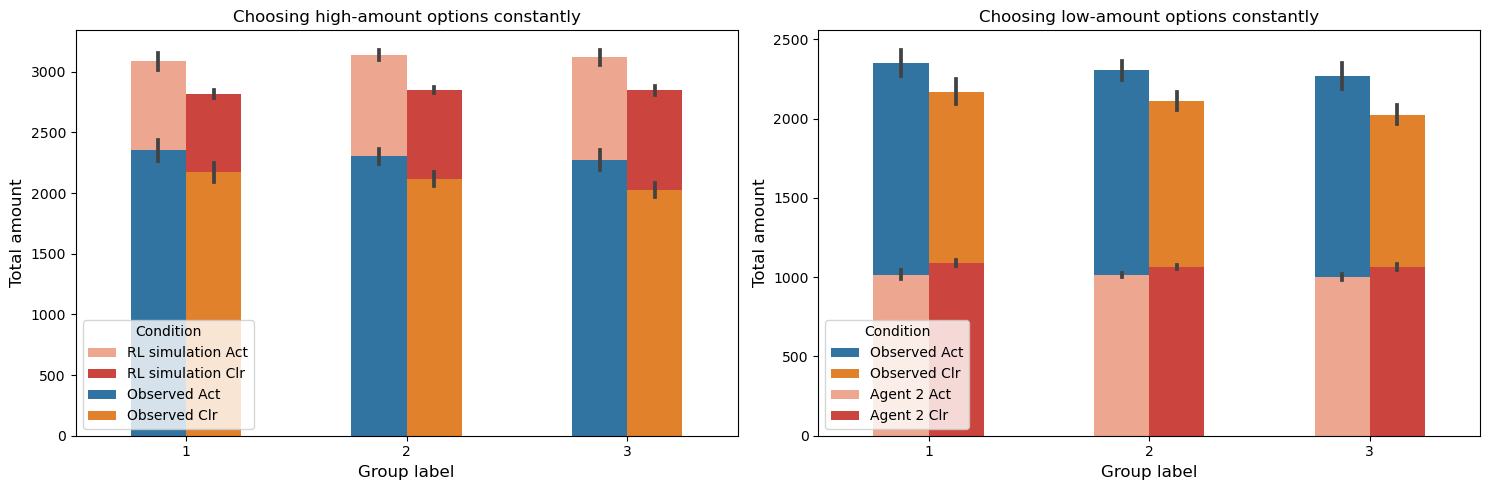

In [28]:
# Select option with higher amount 
pushCorrect_higher_amt = behAll['pushCorrect']*(behAll['winAmtPushable']>=50)*behAll['winAmtPushable']
pullCorrect_higher_amt  = (1-behAll['pushCorrect'])*(behAll['winAmtPullable']>=50)*behAll['winAmtPullable']
agent_higher_ammount = pushCorrect_higher_amt + pullCorrect_higher_amt
behAll['agent_higher_ammount'] = agent_higher_ammount 
# Select option with lower amount 
pushCorrect_lower_amt = behAll['pushCorrect']*(behAll['winAmtPushable']<50)*behAll['winAmtPushable']
pullCorrect_lower_amt  = (1-behAll['yellowCorrect'])*(behAll['winAmtPullable']<50)*behAll['winAmtPullable']
agent_lower_ammount = pushCorrect_lower_amt + pullCorrect_lower_amt
behAll['agent_lower_ammount'] = agent_lower_ammount

fig = plt.figure(figsize=(15, 5), tight_layout = True)
rows = 1
columns = 2

# Plot of left choice
fig.add_subplot(rows, columns, 1)
behAll_high_agent = behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['agent_higher_ammount'].sum()
behAll_high_agent.loc[behAll_high_agent['group']==2,'agent_higher_ammount'] = behAll_high_agent[behAll_high_agent['group']==2]['agent_higher_ammount']/2
sns.barplot(data = behAll_high_agent, x='group', y='agent_higher_ammount', hue='block', width=.5, errorbar="se", palette='Reds')

behAll_wonAmount = behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['wonAmount                '].sum()
behAll_wonAmount.loc[behAll_wonAmount['group']==2,'wonAmount                '] = behAll_wonAmount[behAll_push_agent['group']==2]['wonAmount                ']/2
sn = sns.barplot(data = behAll_wonAmount, x='group', y='wonAmount                ', hue='block', width=.5, errorbar="se")
new_title = 'Condition'
sn.legend_.set_title(new_title)
for t, l in zip(sn.legend_.texts,['RL simulation Act','RL simulation Clr', 'Observed Act','Observed Clr']):
    t.set_text(l)
plt.title('Choosing high-amount options constantly')
plt.ylabel('Total amount', fontsize=12)
plt.xlabel('Group label', fontsize=12)


#Plot of right choice
fig.add_subplot(rows, columns, 2)
behAll_wonAmount = behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['wonAmount                '].sum()
behAll_wonAmount.loc[behAll_wonAmount['group']==2,'wonAmount                '] = behAll_wonAmount[behAll_push_agent['group']==2]['wonAmount                ']/2
sns.barplot(data = behAll_wonAmount, x='group', y='wonAmount                ', hue='block', width=.5, errorbar="se")

behAll_low_agent = behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['agent_lower_ammount'].sum()
behAll_low_agent.loc[behAll_low_agent['group']==2,'agent_lower_ammount'] = behAll_low_agent[behAll_low_agent['group']==2]['agent_lower_ammount']/2
sn = sns.barplot(data = behAll_low_agent, x='group', y='agent_lower_ammount', hue='block', width=.5, errorbar="se", palette='Reds')
new_title = 'Condition'
sn.legend_.set_title(new_title)
for t, l in zip(sn.legend_.texts,['Observed Act','Observed Clr', 'Agent 2 Act','Agent 2 Clr']):
    t.set_text(l)
plt.title('Choosing low-amount options constantly')
plt.ylabel('Total amount', fontsize=12)
plt.xlabel('Group label', fontsize=12)
#plt.savefig('../figures/simulation2_won_ammount.png', dpi=300)

### Probability of choice correct across groups

In [277]:
behAll_correctChoice = behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['correctChoice'].mean()
behAll_correctChoice.groupby(['group', 'block'])['correctChoice'].mean()

group  block
1      Act      0.499986
       Stim     0.501822
2      Act      0.493867
       Stim     0.491968
3      Act      0.498899
       Stim     0.479142
Name: correctChoice, dtype: float64

In [278]:
stats.ttest_rel(behAll_correctChoice[(behAll_correctChoice['block']=='Stim')&(behAll_correctChoice['group']==1)]['correctChoice'],
behAll_correctChoice[(behAll_correctChoice['block']=='Stim')&(behAll_correctChoice['group']==3)]['correctChoice'])

TtestResult(statistic=1.701690874197022, pvalue=0.1035736667104621, df=21)

### Maximum amount that participant can achieve

In [171]:
behAll['agent_max_ammount'] =  behAll['winAmtPushable']*behAll['pushCorrect'] + behAll['winAmtPullable']*(1-behAll['pushCorrect'])

Text(0, 0.5, 'Accumulated amount')

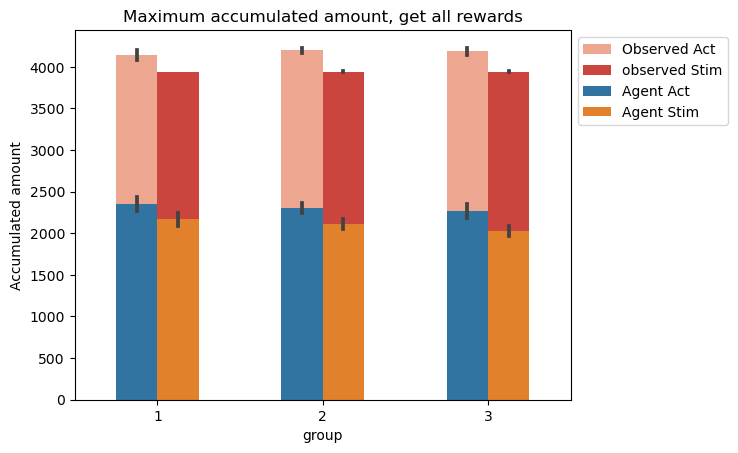

In [173]:
#Plot of maximum amount
behAll_low_agent = behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['agent_max_ammount'].sum()
behAll_low_agent.loc[behAll_low_agent['group']==2,'agent_max_ammount'] = behAll_low_agent[behAll_low_agent['group']==2]['agent_max_ammount']/2
sns.barplot(data = behAll_low_agent, x='group', y='agent_max_ammount', hue='block', width=.5, errorbar="se", palette='Reds')

behAll_wonAmount = behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['wonAmount                '].sum()
behAll_wonAmount.loc[behAll_wonAmount['group']==2,'wonAmount                '] = behAll_wonAmount[behAll_wonAmount['group']==2]['wonAmount                ']/2
ax = sns.barplot(data = behAll_wonAmount, x='group', y='wonAmount                ', hue='block', width=.5, errorbar="se")
legend_handles, _= ax.get_legend_handles_labels()
ax.legend(legend_handles, [ 'Observed Act','observed Stim', 'Agent Act','Agent Stim'], bbox_to_anchor=(1,1))

plt.title('Maximum accumulated amount, get all rewards')
plt.ylabel('Accumulated amount')

#### Aget takes randomly Left/Right, Push/Pull, or Yellow/Pull across trials

Text(0.5, 0, 'Group label')

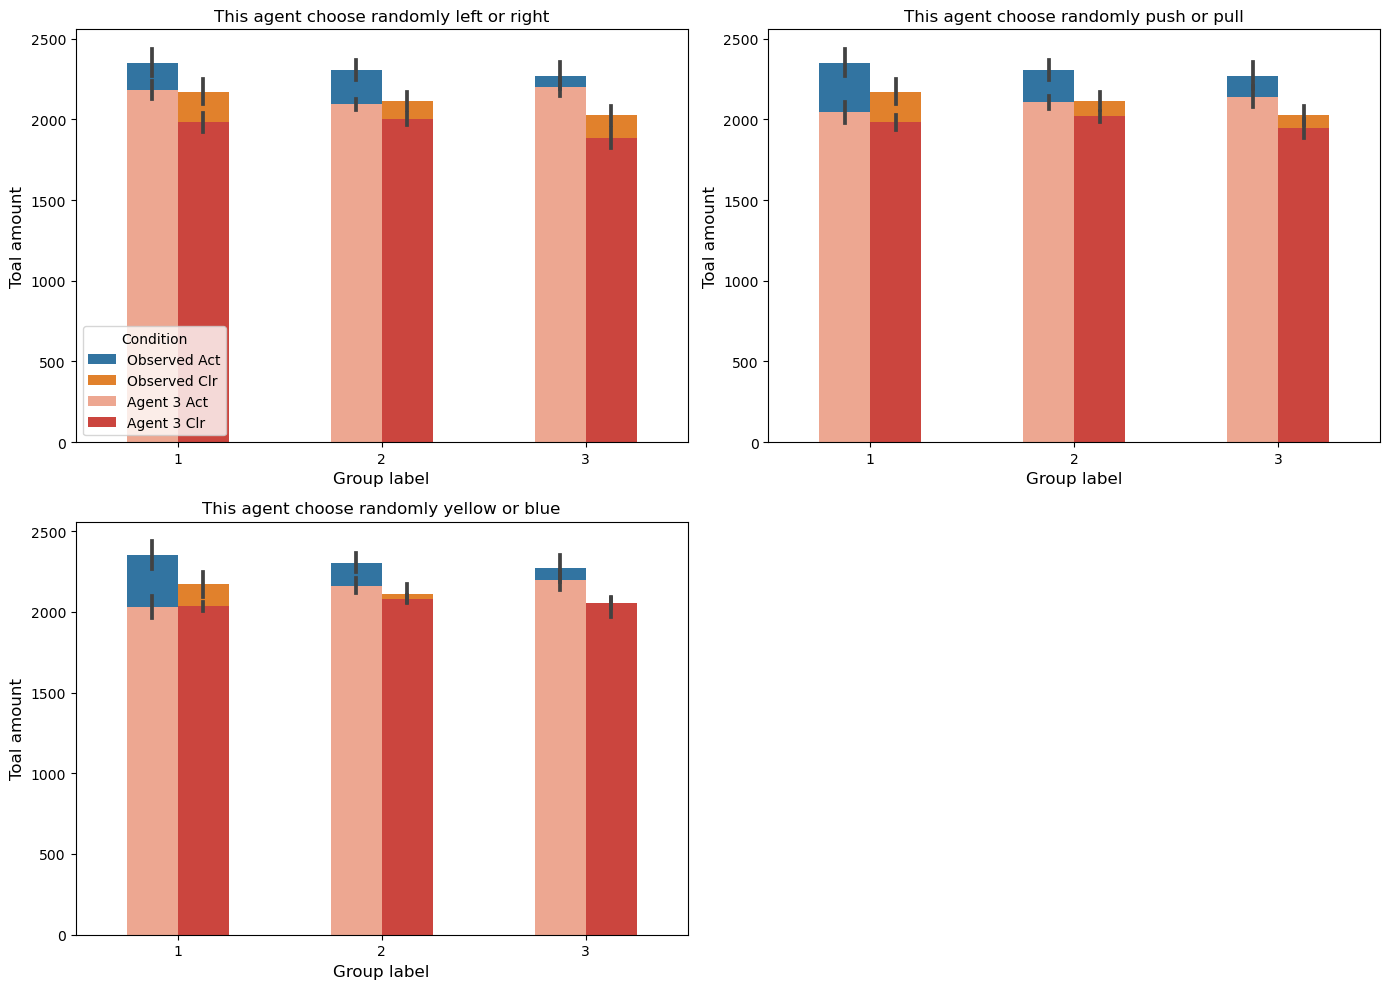

In [36]:
# Select random choice 
rand = np.random.binomial(1,.5, size = behAll.shape[0])

"""This agent choose randomly left or right"""
agentLeftRight = rand*behAll['leftCorrect']*behAll['winAmtLeft'] + (1-rand)*(1-behAll['leftCorrect'])*behAll['winAmtRight']
behAll['agentLeftRight'] = agentLeftRight

"""This agent choose randomly push or pull"""
agentPushPull = rand*behAll['pushCorrect']*behAll['winAmtPushable'] + (1-rand)*(1-behAll['pushCorrect'])*behAll['winAmtPullable']
behAll['agentPushPull'] = agentPushPull

"""This agent choose randomly yellow or blue"""
agentYellBlue = rand*behAll['yellowCorrect']*behAll['winAmtYellow'] + (1-rand)*(behAll['yellowCorrect'])*behAll['winAmtBlue']
behAll['agentYellBlue'] = agentYellBlue
 

fig = plt.figure(figsize=(14, 10), tight_layout = True)
rows = 2
columns = 2

# Plot of left choice
fig.add_subplot(rows, columns, 1)
behAll_wonAmount = behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['wonAmount                '].sum()
behAll_wonAmount.loc[behAll_wonAmount['group']==2,'wonAmount                '] = behAll_wonAmount[behAll_wonAmount['group']==2]['wonAmount                ']/2
sns.barplot(data = behAll_wonAmount, x='group', y='wonAmount                ', hue='block', width=.5, errorbar="se")

behAll_wonAmount_agent = behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['agentLeftRight'].sum()
behAll_wonAmount_agent.loc[behAll_wonAmount_agent['group']==2,'agentLeftRight'] = behAll_wonAmount_agent[behAll_wonAmount_agent['group']==2]['agentLeftRight']/2
sn = sns.barplot(data = behAll_wonAmount_agent, x='group', y='agentLeftRight', hue='block', width=.5, errorbar="se", palette='Reds')
new_title = 'Condition'
sn.legend_.set_title(new_title)
for t, l in zip(sn.legend_.texts,['Observed Act','Observed Clr', 'Agent 3 Act','Agent 3 Clr']):
    t.set_text(l)
plt.title('This agent choose randomly left or right')
plt.ylabel('Toal amount', fontsize=12)
plt.xlabel('Group label', fontsize=12)

# Plot of pushing
fig.add_subplot(rows, columns, 2)
behAll_wonAmount = behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['wonAmount                '].sum()
behAll_wonAmount.loc[behAll_wonAmount['group']==2,'wonAmount                '] = behAll_wonAmount[behAll_wonAmount['group']==2]['wonAmount                ']/2
sns.barplot(data = behAll_wonAmount, x='group', y='wonAmount                ', hue='block', width=.5, errorbar="se")
legend_handles, _= ax.get_legend_handles_labels()

behAll_push_agent = behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['agentPushPull'].sum()
behAll_push_agent.loc[behAll_push_agent['group']==2,'agentPushPull'] = behAll_push_agent[behAll_push_agent['group']==2]['agentPushPull']/2
sn = sns.barplot(data = behAll_push_agent, x='group', y='agentPushPull', hue='block', width=.5, errorbar="se", palette='Reds')
sn.legend_.remove()
plt.title('This agent choose randomly push or pull')
plt.ylabel('Toal amount', fontsize=12)
plt.xlabel('Group label', fontsize=12) 

# Plot of chosen yellow
fig.add_subplot(rows, columns, 3)
behAll_wonAmount = behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['wonAmount                '].sum()
behAll_wonAmount.loc[behAll_wonAmount['group']==2,'wonAmount                '] = behAll_wonAmount[behAll_push_agent['group']==2]['wonAmount                ']/2
sns.barplot(data = behAll_wonAmount, x='group', y='wonAmount                ', hue='block', width=.5, errorbar="se")

behAll_yell_agent = behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['agentYellBlue'].sum()
behAll_yell_agent.loc[behAll_yell_agent['group']==2,'agentYellBlue'] = behAll_yell_agent[behAll_yell_agent['group']==2]['agentYellBlue']/2
sn = sns.barplot(data = behAll_yell_agent, x='group', y='agentYellBlue', hue='block', width=.5, errorbar="se", palette='Reds')
sn.legend_.remove()
plt.title('This agent choose randomly yellow or blue')
plt.ylabel('Toal amount', fontsize=12)
plt.xlabel('Group label', fontsize=12)
  
#plt.savefig('../figures/simulation3_won_ammount.png', dpi=300)

### Agent take the strategy of winstay and loseshift for choosing left and right

In [37]:
"""This agent takes winStay/loseShift for choosing left or right regradless of Action and Color conditions"""
leftChoicesAgent4 = np.zeros(behAll.shape[0])

for i in range(behAll.shape[0]-1):
    if (leftChoicesAgent4[i]==1) and (leftChoicesAgent4[i] == behAll['leftCorrect'][i]):
        leftChoicesAgent4[i + 1] = 1
    elif (leftChoicesAgent4[i]==0) and (leftChoicesAgent4[i] == behAll['leftCorrect'][i]):
        leftChoicesAgent4[i + 1] = 0
    elif (leftChoicesAgent4[i]==1) and (leftChoicesAgent4[i] != behAll['leftCorrect'][i]):
        leftChoicesAgent4[i + 1] = 0  
    elif (leftChoicesAgent4[i]==0) and (leftChoicesAgent4[i] != behAll['leftCorrect'][i]):
        leftChoicesAgent4[i + 1] = 1
# Rewarded choice for agen4
behAll['correctAgent4'] = leftChoicesAgent4*behAll['leftCorrect'] + (1-leftChoicesAgent4)*(1-behAll['leftCorrect'])
# Rewarded left choice for agen4
leftCorrectAgent4 = leftChoicesAgent4*behAll['leftCorrect']
# Rewarded right choice for agen4
rightCorrectAgent4 = (1-leftChoicesAgent4)*(1-behAll['leftCorrect'])
# won amount 
behAll['wonAmtAgent4'] = leftChoicesAgent4*behAll['leftCorrect']*behAll['winAmtLeft'] + (1-leftChoicesAgent4)*(1-behAll['leftCorrect'])*behAll['winAmtRight']

Text(0, 0.5, 'Total amount')

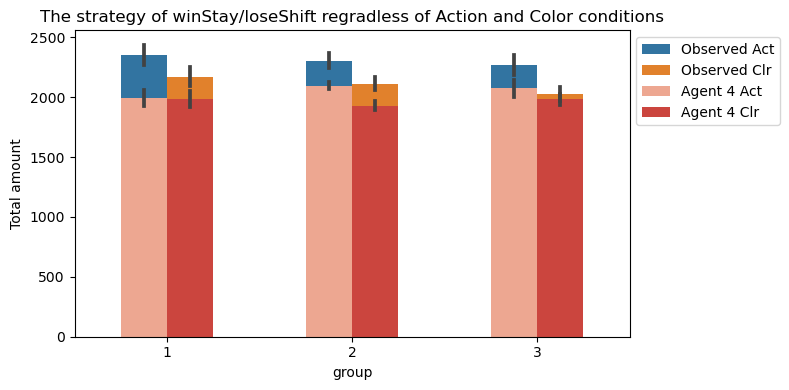

In [39]:
fig = plt.figure(figsize=(8, 4), tight_layout = True)

# total amount of observed data
behAll_wonAmount = behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['wonAmount                '].sum()
behAll_wonAmount.loc[behAll_wonAmount['group']==2,'wonAmount                '] = behAll_wonAmount[behAll_wonAmount['group']==2]['wonAmount                ']/2
sns.barplot(data = behAll_wonAmount, x='group', y='wonAmount                ', hue='block', width=.5, errorbar="se")
# toral amount of agent 4
behAll_wonAmount_agent4 = behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['wonAmtAgent4'].sum()
behAll_wonAmount_agent4.loc[behAll_wonAmount_agent4['group']==2,'wonAmtAgent4'] = behAll_wonAmount_agent4[behAll_wonAmount_agent4['group']==2]['wonAmtAgent4']/2
ax = sns.barplot(data = behAll_wonAmount_agent4, x='group', y='wonAmtAgent4', hue='block', width=.5, errorbar="se", palette='Reds')
legend_handles, _= ax.get_legend_handles_labels()
ax.legend(legend_handles, ['Observed Act','Observed Clr', 'Agent 4 Act','Agent 4 Clr'], bbox_to_anchor=(1,1))

plt.title('The strategy of winStay/loseShift regradless of Action and Color conditions')
plt.ylabel('Total amount')

#plt.savefig('../figures/simulation4_won_ammount.png', dpi=300)

### Agent take the strategy of winstay and loseshift for pushing or pulling

In [153]:
"""This agent takes winStay/loseShift for pushing/pulling or yellowChosen/BlueChosen regarding Action and COlor conditions"""
choiceAgent5 = np.zeros(behAll.shape[0])

for i in range(behAll.shape[0]-1):
    # set the typs pf rewarded option regarding to block
    if behAll['block'][i] =='Act':
        type = 'pushCorrect'
    elif behAll['block'][i] =='Stim':
        type = 'yellowCorrect'
        
    if (choiceAgent5[i]==1) and (choiceAgent5[i] == behAll[type][i]):
        choiceAgent5[i + 1] = 1
    elif (choiceAgent5[i]==0) and (choiceAgent5[i] == behAll[type][i]):
        choiceAgent5[i + 1] = 0
    elif (choiceAgent5[i]==1) and (choiceAgent5[i] != behAll[type][i]):
        choiceAgent5[i + 1] = 0  
    elif (choiceAgent5[i]==0) and (choiceAgent5[i] != behAll[type][i]):
        choiceAgent5[i + 1] = 1

# Rewarded choice for agen 5
behAll['correctAgent5'] = (behAll['block'] =='Act')*(choiceAgent5*behAll['pushCorrect'] + (1-choiceAgent5)*(1-behAll['pushCorrect'])) + (behAll['block'] =='Stim')*(choiceAgent5*behAll['yellowCorrect'] + (1-choiceAgent5)*(1-behAll['yellowCorrect'])) 
# Wom amount for agen 5
behAll['wonAmtAgent5'] = (behAll['block'] =='Act')*(choiceAgent5*behAll['pushCorrect']*behAll['winAmtPushable'] + (1-choiceAgent5)*(1-behAll['pushCorrect'])*behAll['winAmtPullable']) + (behAll['block'] =='Stim')*(choiceAgent5*behAll['yellowCorrect']*behAll['winAmtYellow'] + (1-choiceAgent5)*(1-behAll['yellowCorrect'])*behAll['winAmtBlue']) 


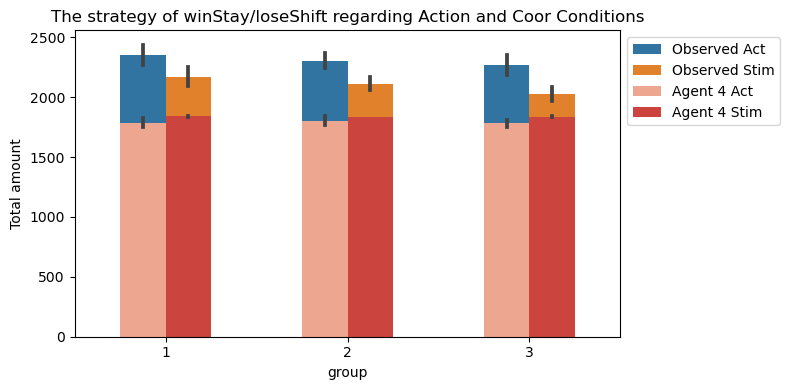

In [154]:
fig = plt.figure(figsize=(8, 4), tight_layout = True)

# total amount of observed data
behAll_wonAmount = behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['wonAmount                '].sum()
behAll_wonAmount.loc[behAll_wonAmount['group']==2,'wonAmount                '] = behAll_wonAmount[behAll_wonAmount['group']==2]['wonAmount                ']/2
sns.barplot(data = behAll_wonAmount, x='group', y='wonAmount                ', hue='block', width=.5, errorbar="se")
# toral amount of agent 5
behAll_wonAmount_agent5 = behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['wonAmtAgent5'].sum()
behAll_wonAmount_agent5.loc[behAll_wonAmount_agent5['group']==2,'wonAmtAgent5'] = behAll_wonAmount_agent5[behAll_wonAmount_agent5['group']==2]['wonAmtAgent5']/2
ax = sns.barplot(data = behAll_wonAmount_agent5, x='group', y='wonAmtAgent5', hue='block', width=.5, errorbar="se", palette='Reds')
legend_handles, _= ax.get_legend_handles_labels()
ax.legend(legend_handles, ['Observed Act','Observed Stim', 'Agent 4 Act','Agent 4 Stim'], bbox_to_anchor=(1,1))

plt.title('WinStay/loseShift base on Action and Color conditions')
plt.ylabel('Total amount', fontsize=12)
plt.xlabel('Group label', fontsize=12)

plt.savefig('../figures/simulation5_won_ammount.png', dpi=300)


### Agent chooses options with the higher probability of rewarding. 

In [188]:
# Rewarded choice for agen 6
behAll['choiceAgent6'] = np.nan

# List of subjects
subList = ['sub-004', 'sub-010', 'sub-012', 'sub-025', 'sub-026', 'sub-029', 'sub-030',
           'sub-033', 'sub-034', 'sub-036', 'sub-040', 'sub-041', 'sub-042', 'sub-044', 
           'sub-045', 'sub-047', 'sub-048', 'sub-052', 'sub-054', 'sub-056', 'sub-059', 
           'sub-060', 'sub-064', 'sub-065', 'sub-067', 'sub-069', 'sub-070', 'sub-071', 
           'sub-074', 'sub-075', 'sub-076', 'sub-077', 'sub-078', 'sub-079', 'sub-080', 
           'sub-081', 'sub-082', 'sub-083', 'sub-085', 'sub-087', 'sub-088', 'sub-089', 
           'sub-090', 'sub-092', 'sub-108', 'sub-109']

for subName in subList:
    for sess in [1,2]:
        for run in [1,2]:
            for cond in ['Stim', 'Act']:
                if cond=='Act':
                    # To select push and pull in action value learning
                    typeCorrect = 'pushCorrect'
                elif cond=='Stim':
                    # To select yellow and blue in color value learning
                    typeCorrect = 'yellowCorrect'
                
                # take data from specific session, run for a subject
                actData = behAll[(behAll['session']==sess) & (behAll['run']==run) & (behAll['block']==cond) & (behAll['sub_ID']==subName)]
                # if the reversal point is 21
                if actData['reverse'].unique()==21:
                    # Phase 1
                    actDataPhase1 = actData[actData['phase']=='phase1']
                    propPhase1 = actDataPhase1[typeCorrect].mean()
                    # Chossing option with higher probability reward
                    behAll.loc[(behAll['session']==sess) & (behAll['run']==run) & (behAll['block']==cond) & (behAll['sub_ID']==subName)& (behAll['phase']=='phase1'), 'choiceAgent6'] = round(propPhase1)
                    # Phase 2
                    actDataPhase2 = actData[actData['phase']=='phase2']
                    propPhase2 = actDataPhase2[typeCorrect].mean()
                    # Chossing option with higher probability reward
                    behAll.loc[(behAll['session']==sess) & (behAll['run']==run) & (behAll['block']==cond) & (behAll['sub_ID']==subName)& (behAll['phase']=='phase2'), 'choiceAgent6'] = round(propPhase2)
                # if the reversal point is 14
                elif actData['reverse'].unique()==14:
                    # Phase 1
                    actDataPhase1 = actData[actData['phase']=='phase1']
                    propPhase1 = actDataPhase1[typeCorrect].mean()
                    # Chossing option with higher probability reward
                    behAll.loc[(behAll['session']==sess) & (behAll['run']==run) & (behAll['block']==cond) & (behAll['sub_ID']==subName)& (behAll['phase']=='phase1'), 'choiceAgent6'] = round(propPhase1)
                    # Phase 2
                    actDataPhase2 = actData[actData['phase']=='phase2']
                    propPhase2 = actDataPhase2[typeCorrect].mean()
                    # Chossing option with higher probability reward
                    behAll.loc[(behAll['session']==sess) & (behAll['run']==run) & (behAll['block']==cond) & (behAll['sub_ID']==subName)& (behAll['phase']=='phase2'), 'choiceAgent6'] = round(propPhase2)
                    # Phase 3
                    actDataPhase3 = actData[actData['phase']=='phase3']
                    propPhase3 = actDataPhase3[typeCorrect].mean()
                    # Chossing option with higher probability reward
                    behAll.loc[(behAll['session']==sess) & (behAll['run']==run) & (behAll['block']==cond) & (behAll['sub_ID']==subName)& (behAll['phase']=='phase3'), 'choiceAgent6'] = round(propPhase3)

# Wom amount for agen 5
behAll['wonAmtAgent6'] = (behAll['block'] =='Act')*(behAll['choiceAgent6'] *behAll['pushCorrect']*behAll['winAmtPushable'] + (1-behAll['choiceAgent6'] )*(1-behAll['pushCorrect'])*behAll['winAmtPullable']) + (behAll['block'] =='Stim')*(behAll['choiceAgent6'] *behAll['yellowCorrect']*behAll['winAmtYellow'] + (1-behAll['choiceAgent6'] )*(1-behAll['yellowCorrect'])*behAll['winAmtBlue']) 

In [189]:
# test 
i=6
behAll[behAll['sub_ID']=='sub-048']['choiceAgent6'].to_numpy()[42*i:42*(i+1)]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

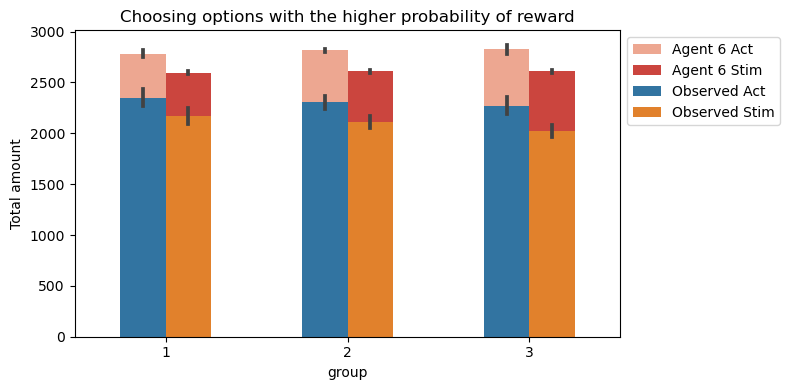

In [191]:
fig = plt.figure(figsize=(8, 4), tight_layout = True)

# toral amount of agent 6
behAll_wonAmount_agent6 = behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['wonAmtAgent6'].sum()
behAll_wonAmount_agent6.loc[behAll_wonAmount_agent6['group']==2,'wonAmtAgent6'] = behAll_wonAmount_agent6[behAll_wonAmount_agent6['group']==2]['wonAmtAgent6']/2
sns.barplot(data = behAll_wonAmount_agent6, x='group', y='wonAmtAgent6', hue='block', width=.5, errorbar="se", palette='Reds')
# total amount of observed data
behAll_wonAmount = behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['wonAmount                '].sum()
behAll_wonAmount.loc[behAll_wonAmount['group']==2,'wonAmount                '] = behAll_wonAmount[behAll_wonAmount['group']==2]['wonAmount                ']/2
ax = sns.barplot(data = behAll_wonAmount, x='group', y='wonAmount                ', hue='block', width=.5, errorbar="se")
legend_handles, _= ax.get_legend_handles_labels()
ax.legend(legend_handles, ['Agent 6 Act','Agent 6 Stim', 'Observed Act','Observed Stim'], bbox_to_anchor=(1,1))


plt.title('Choosing options with the higher probability of reward')
plt.ylabel('Total amount')

plt.savefig('../figures/simulation6_won_ammount.png', dpi=300)

### The agent choice option stochastically with higher probability of reward

In [206]:
# Rewarded choice for agen 6
behAll['choiceAgent7'] = np.nan

# List of subjects
subList = ['sub-004', 'sub-010', 'sub-012', 'sub-025', 'sub-026', 'sub-029', 'sub-030',
           'sub-033', 'sub-034', 'sub-036', 'sub-040', 'sub-041', 'sub-042', 'sub-044', 
           'sub-045', 'sub-047', 'sub-048', 'sub-052', 'sub-054', 'sub-056', 'sub-059', 
           'sub-060', 'sub-064', 'sub-065', 'sub-067', 'sub-069', 'sub-070', 'sub-071', 
           'sub-074', 'sub-075', 'sub-076', 'sub-077', 'sub-078', 'sub-079', 'sub-080', 
           'sub-081', 'sub-082', 'sub-083', 'sub-085', 'sub-087', 'sub-088', 'sub-089', 
           'sub-090', 'sub-092', 'sub-108', 'sub-109']

for subName in subList:
    for sess in [1,2]:
        for run in [1,2]:
            for cond in ['Stim', 'Act']:
                if cond=='Act':
                    # To select push and pull in action value learning
                    typeCorrect = 'pushCorrect'
                elif cond=='Stim':
                    # To select yellow and blue in color value learning
                    typeCorrect = 'yellowCorrect'
                
                # take data from specific session, run for a subject
                actData = behAll[(behAll['session']==sess) & (behAll['run']==run) & (behAll['block']==cond) & (behAll['sub_ID']==subName)]
                # if the reversal point is 21
                if actData['reverse'].unique()==21:
                    # Phase 1
                    actDataPhase1 = actData[actData['phase']=='phase1']
                    propPhase1 = actDataPhase1[typeCorrect].mean()
                    # Choosing option with stochastic way,
                    len_phase1 = behAll[(behAll['session']==sess) & (behAll['run']==run) & (behAll['block']==cond) & (behAll['sub_ID']==subName)& (behAll['phase']=='phase1')].shape[0]
                    if round(propPhase1) == 1:
                        stoch_propPhase1 = np.random.binomial(n= 1, p= .75, size= len_phase1)
                    elif  round(propPhase1) == 0:
                        stoch_propPhase1 = np.random.binomial(n= 1, p= .25, size= len_phase1)
                    behAll.loc[(behAll['session']==sess) & (behAll['run']==run) & (behAll['block']==cond) & (behAll['sub_ID']==subName)& (behAll['phase']=='phase1'), 'choiceAgent7'] = stoch_propPhase1
                    # Phase 2
                    actDataPhase2 = actData[actData['phase']=='phase2']
                    propPhase2 = actDataPhase2[typeCorrect].mean()
                    # Choosing option with stochastic way,
                    len_phase2 = behAll[(behAll['session']==sess) & (behAll['run']==run) & (behAll['block']==cond) & (behAll['sub_ID']==subName)& (behAll['phase']=='phase2')].shape[0]
                    if round(propPhase2) == 1:
                        stoch_propPhase2 = np.random.binomial(n= 1, p= .75, size= len_phase2)
                    elif round(propPhase2) == 0:
                        stoch_propPhase2 = np.random.binomial(n= 1, p= .25, size= len_phase2)
                    behAll.loc[(behAll['session']==sess) & (behAll['run']==run) & (behAll['block']==cond) & (behAll['sub_ID']==subName)& (behAll['phase']=='phase2'), 'choiceAgent7'] = stoch_propPhase2

                # if the reversal point is 14
                elif actData['reverse'].unique()==14:
                    # Phase 1
                    actDataPhase1 = actData[actData['phase']=='phase1']
                    propPhase1 = actDataPhase1[typeCorrect].mean()
                    # Choosing option with stochastic way,
                    len_phase1 = behAll[(behAll['session']==sess) & (behAll['run']==run) & (behAll['block']==cond) & (behAll['sub_ID']==subName)& (behAll['phase']=='phase1')].shape[0]
                    if round(propPhase1) == 1:
                        stoch_propPhase1 = np.random.binomial(n= 1, p= .75, size= len_phase1)
                    elif round(propPhase1) == 0:
                        stoch_propPhase1 = np.random.binomial(n= 1, p= .25, size= len_phase1)
                    behAll.loc[(behAll['session']==sess) & (behAll['run']==run) & (behAll['block']==cond) & (behAll['sub_ID']==subName)& (behAll['phase']=='phase1'), 'choiceAgent7'] = stoch_propPhase1
                    # Phase 2
                    actDataPhase2 = actData[actData['phase']=='phase2']
                    propPhase2 = actDataPhase2[typeCorrect].mean()
                    # Choosing option with stochastic way
                    len_phase2 = behAll[(behAll['session']==sess) & (behAll['run']==run) & (behAll['block']==cond) & (behAll['sub_ID']==subName)& (behAll['phase']=='phase2')].shape[0]
                    if round(propPhase2) == 1:
                        stoch_propPhase2 = np.random.binomial(n= 1, p= .75, size= len_phase2)
                    elif round(propPhase2) == 0:
                        stoch_propPhase2 = np.random.binomial(n= 1, p= .25, size= len_phase2)
                    behAll.loc[(behAll['session']==sess) & (behAll['run']==run) & (behAll['block']==cond) & (behAll['sub_ID']==subName)& (behAll['phase']=='phase2'), 'choiceAgent7'] = stoch_propPhase2
                    # Phase 3
                    actDataPhase3 = actData[actData['phase']=='phase3']
                    propPhase3 = actDataPhase3[typeCorrect].mean()
                    # Choosing option with stochastic way
                    len_phase3 = behAll[(behAll['session']==sess) & (behAll['run']==run) & (behAll['block']==cond) & (behAll['sub_ID']==subName)& (behAll['phase']=='phase3')].shape[0]
                    if round(propPhase3) == 1:
                        stoch_propPhase3 = np.random.binomial(n= 1, p= .75, size= len_phase2)
                    elif round(propPhase3) == 0:
                        stoch_propPhase3 = np.random.binomial(n= 1, p= .25, size= len_phase2)
                    behAll.loc[(behAll['session']==sess) & (behAll['run']==run) & (behAll['block']==cond) & (behAll['sub_ID']==subName)& (behAll['phase']=='phase3'), 'choiceAgent7'] = stoch_propPhase3

# Wom amount for agen 7
behAll['wonAmtAgent7'] = (behAll['block'] =='Act')*(behAll['choiceAgent7'] *behAll['pushCorrect']*behAll['winAmtPushable'] + (1-behAll['choiceAgent7'] )*(1-behAll['pushCorrect'])*behAll['winAmtPullable']) + (behAll['block'] =='Stim')*(behAll['choiceAgent7'] *behAll['yellowCorrect']*behAll['winAmtYellow'] + (1-behAll['choiceAgent7'] )*(1-behAll['yellowCorrect'])*behAll['winAmtBlue']) 

Text(0, 0.5, 'Total amount')

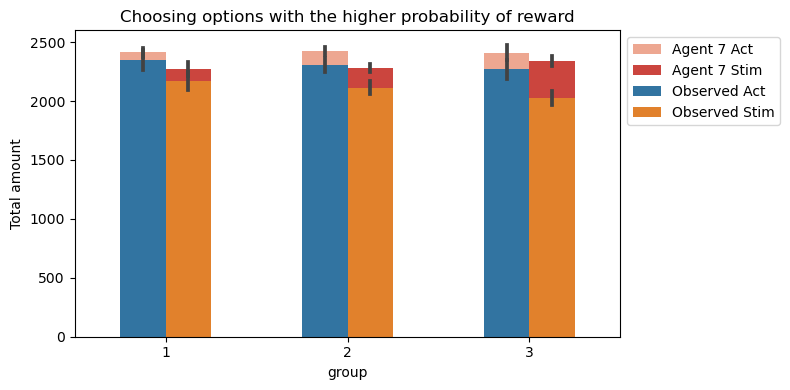

In [207]:
fig = plt.figure(figsize=(8, 4), tight_layout = True)

# toral amount of agent 6
behAll_wonAmount_agent6 = behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['wonAmtAgent7'].sum()
behAll_wonAmount_agent6.loc[behAll_wonAmount_agent6['group']==2,'wonAmtAgent7'] = behAll_wonAmount_agent6[behAll_wonAmount_agent6['group']==2]['wonAmtAgent7']/2
sns.barplot(data = behAll_wonAmount_agent6, x='group', y='wonAmtAgent7', hue='block', width=.5, errorbar="se", palette='Reds')
# total amount of observed data
behAll_wonAmount = behAll.groupby(['group', 'block', 'sub_ID'], as_index=False)['wonAmount                '].sum()
behAll_wonAmount.loc[behAll_wonAmount['group']==2,'wonAmount                '] = behAll_wonAmount[behAll_wonAmount['group']==2]['wonAmount                ']/2
ax = sns.barplot(data = behAll_wonAmount, x='group', y='wonAmount                ', hue='block', width=.5, errorbar="se")
legend_handles, _= ax.get_legend_handles_labels()
ax.legend(legend_handles, ['Agent 7 Act','Agent 7 Stim', 'Observed Act','Observed Stim'], bbox_to_anchor=(1,1))


plt.title('Choosing options with the higher probability of reward')
plt.ylabel('Total amount')

#plt.savefig('../figures/simulation7_won_ammount.png', dpi=300)